## Week 5 Lab: Classification with Logistic Regression 


Welcome to the Week 5 Lab Session on Classification with Logistic Regression. This week, we will delve into the essential data preprocessing steps and introduce you to tools and processes that will help you process data effectively. While we will cover a variety of techniques, our focus will remain within the `tidyverse` ecosystem to provide you with a consistent set of tools that facilitate connecting ideas and building upon previous knowledge.


### The Dataset

For this week's lab, we will use the Default dataset from the ISLR (Introduction to Statistical Learning with R) book. This dataset contains information on whether an individual defaults on their credit card payment along with predictors such as income, balance, and student status. It is an excellent example for practicing logistic regression.

### Metadata

__default:__ Indicates whether the individual defaulted on their credit card payment, (Yes, No)  <br>
__student:__ Indicates whether the individual is a student. (Yes, No) <br>
__balance:__ The balance on the individual's credit card. <br>
__income:__ The individual's annual income. 


### Importing the Dataset

There are a few options to import the dataset. You may use the `ISLR` packages and load the data directly. You can also find the dataset within our `Datasets` folder and read it as a `.csv` file. Below we use the latter option.



In [1]:
# Loading the necessary packages
library(tidyverse)
library(tidymodels)

-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v dplyr     1.1.4     v readr     2.1.5
v forcats   1.0.0     v stringr   1.5.1
v ggplot2   3.5.1     v tibble    3.2.1
v lubridate 1.9.3     v tidyr     1.3.1
v purrr     1.0.2     
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
i Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
-- Attaching packages -------------------------------------- tidymodels 1.2.0 --

v broom        1.0.7     v rsample      1.2.1
v dials        1.3.0     v tune         1.2.1
v infer        1.0.7     v workflows    1.1.4
v modeldata    1.4.0     v workflowsets 1.1.0
v parsnip      1.2.1     v yardstick    1.3.1
v recipes      1.1.0     

-- Conflicts ----------------------------------------- tidymodels_conflicts() --
x scales::discard() masks purrr::discard()
x dplyr::filt

In [2]:
credit_data <- read.csv('Datasets/Default.csv')
credit_data <- as_tibble(credit_data) %>% rename(default='X...default')

slice_head(credit_data, n = 8) 

default,student,balance,income
<chr>,<chr>,<dbl>,<dbl>
No,No,729.5265,44361.625
No,Yes,817.1804,12106.135
No,No,1073.5492,31767.139
No,No,529.2506,35704.494
No,No,785.6559,38463.496
No,Yes,919.5885,7491.559
No,No,825.5133,24905.227
No,Yes,808.6675,17600.451


In [3]:
dim(credit_data)

[1] 10000     4

<br>

Let's begin by recreating some of the charts for the ISLR book. This is meant to provide additional practice and some thinking around what features are more useful.

Warning message:
"The `scale_name` argument of `discrete_scale()` is deprecated as of ggplot2
3.5.0."


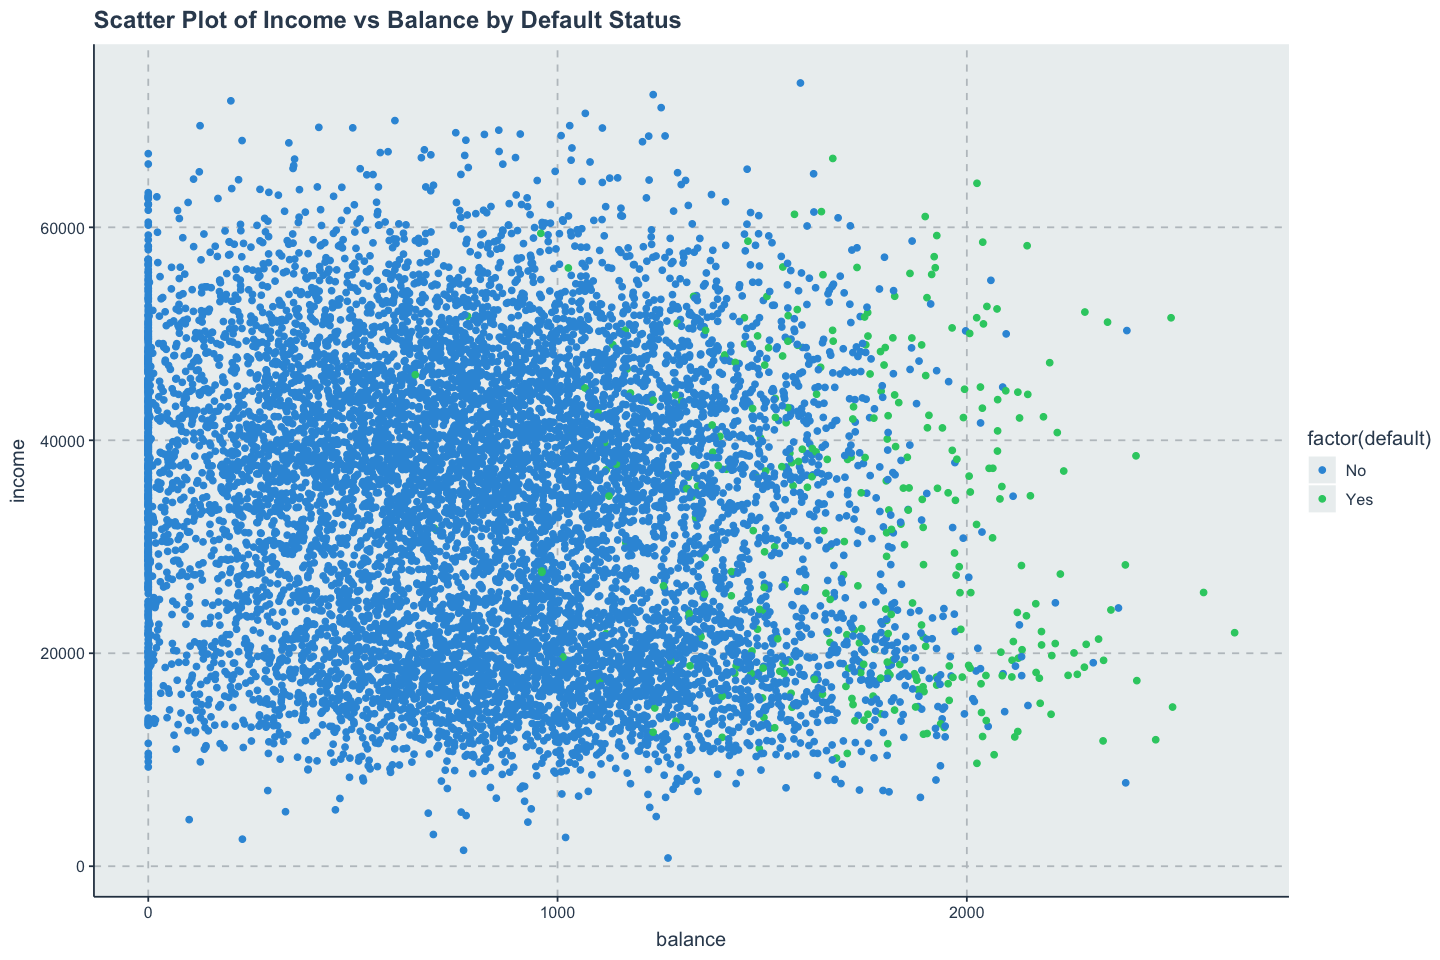

In [4]:
library(ggthemr)
library(ggplot2)

# setting the them for visualization
ggthemr('flat')

# setting plot dimensions
options( repr.plot.width = 12, repr.plot.height = 8 )
ggplot(data = credit_data, aes(x = balance, y = income, color = factor(default))) + 
    geom_point() + 
    ggtitle('Scatter Plot of Income vs Balance by Default Status')


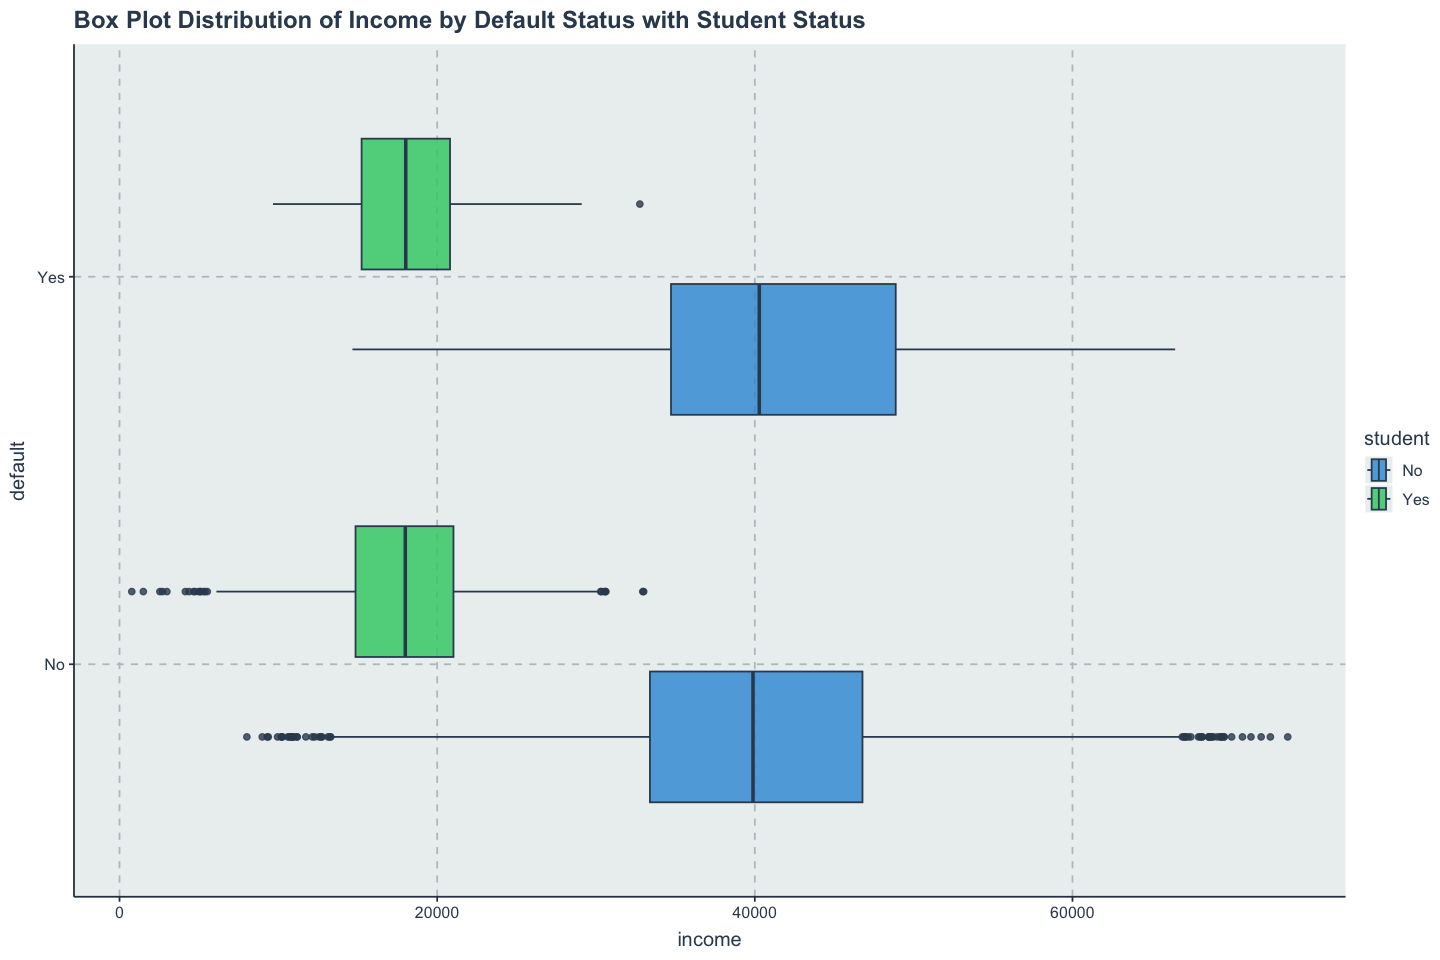

In [5]:
# first plot
ggplot( data = credit_data, aes(x = income, y= default,fill = student) ) + 
        geom_boxplot( alpha = .8) + 
        ggtitle('Box Plot Distribution of Income by Default Status with Student Status')

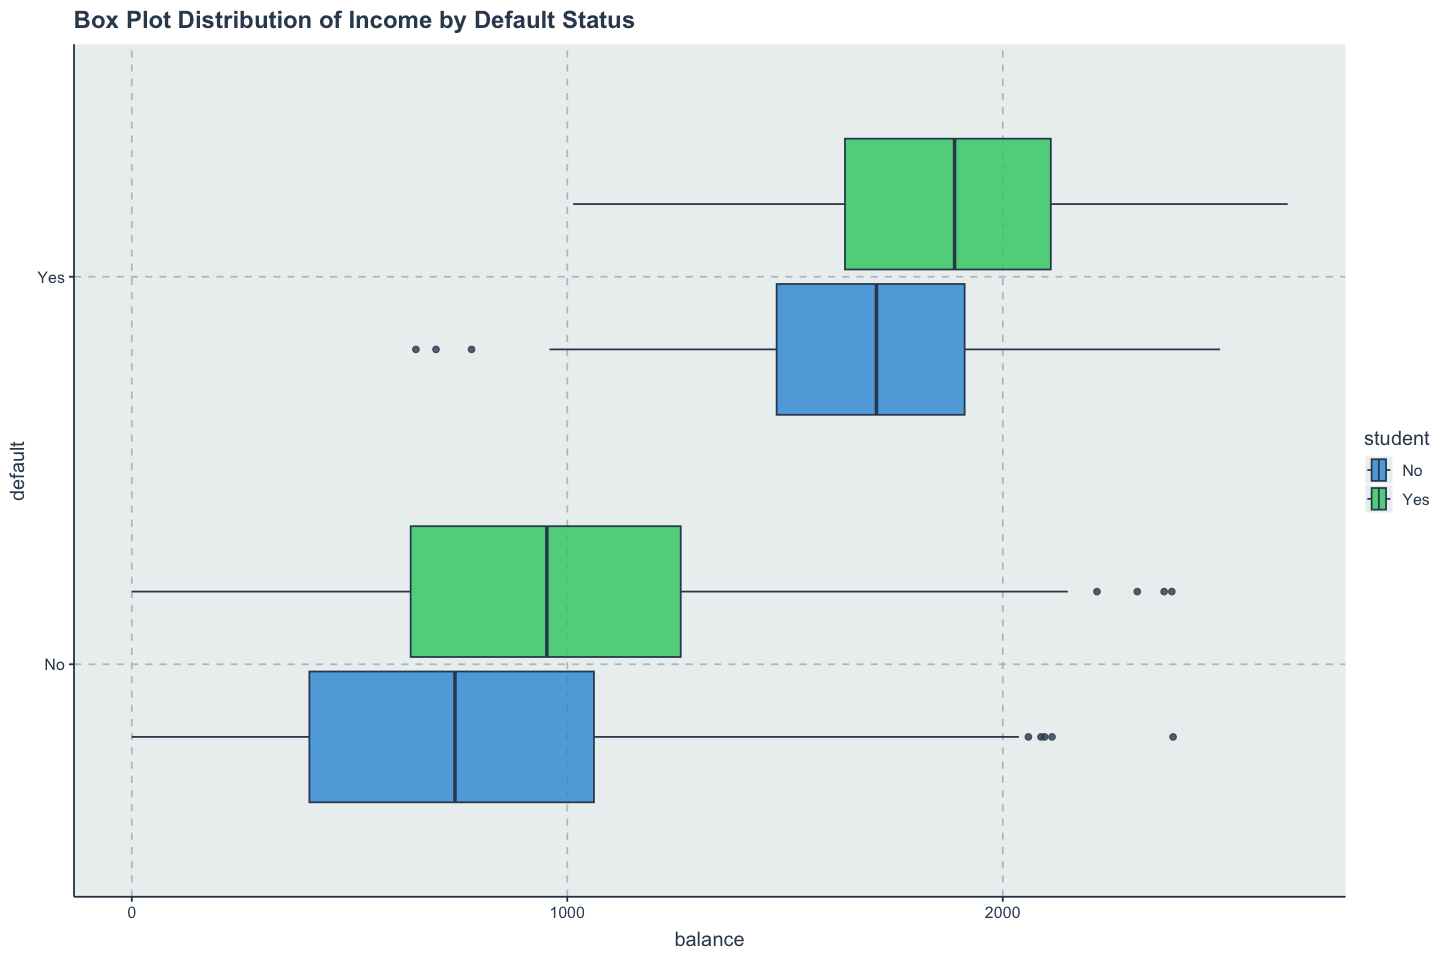

In [6]:
ggplot( data = credit_data, aes(x = balance, y= default,fill = student) ) + 
        geom_boxplot( alpha = .8) + 
        ggtitle('Box Plot Distribution of Income by Default Status')

<br>

We can begin get an indication that `balance` offers useful predictive capabilities for determining `Default` status. 

<br>

### Data Preparation for Modelling

In the previous discussions, we have learned about splitting the dataset ahead of a modeling task. This section covers the preparation we need. Before we split the data, we must convert the `default` and `student` into factors inorder to make the eligible as inputs to the model.

__Changing Categorical Variables into Factors__

In [7]:
# changing categorical variables into factors
credit_data <- credit_data %>%
                mutate( default = as.factor(default),
                        student = as.factor(default))

<br>

__Splitting the dataset into Train and Test__

We can now go ahead and split the data into train and test groups.

In [8]:
# for reproducibility
set.seed(514)

# setting the split model
data_split = initial_split( credit_data, prop = .8, strata = 'default' )

# splitting the dataset
train_data = training(data_split)
test_data = testing(data_split)

<br>

### Building the Logistic Regression Model

On this section, we will build a logistic regression model using the `tidyverse` and `tidymodels` packages in R. Logistic regression is used to model the probability of a binary outcome based on one or more predictor variables. We will use the Default dataset from the ISLR package to demonstrate this process.

Recall that the model takes the form:

$$p(y = Default | X) = \beta_0 + \beta_1X$$ 

With the logistic function, it can be written as:

$$ p(Y) = \frac {e^{\beta_0 + \beta_1 X}} {1 + e^{\beta_0 + \beta_1 X} } $$


Now let's see the implementation of this with `tidymodels`. As usual, with `tidymodels`, we begin with configurations of the model type, engine and model task.

In [9]:
# Specify a logistic regression model
logistic_model <- logistic_reg() %>%
                   # Set the engine to "glm" which uses the generalized linear model function in R
                   set_engine("glm") %>%
                   # Set the mode to "classification" since logistic regression is used for binary outcomes
                   set_mode("classification")

<br>

### Describing and Fitting the Model

Our model itself is of the form:

$$ p(x) =  \beta_0 + \beta_1 Income + \beta_2 balance $$

Let's run a fit on our model and display the model parameters we have received.


In [10]:
model <- logistic_model %>% 
           fit( data = train_data, formula = default ~ income + balance )

tidy(model)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),-1.159071e+01,4.879481e-01,-23.75398,9.993783e-125
income,2.050130e-05,5.520763e-06,3.71349,2.044203e-04
balance,5.680010e-03,2.539834e-04,22.36370,8.883035e-111


<br>

The `logistic` regression model output is similar to the linear regression, however, it is important to consider the intepretation of the model for the specific task.

#### Model Parameter Output

We have already seen how to get the model parameters output in tidy format. A useful detail to add here is that we can also retrive the summary of the model which is built into the `glm` function. The results can then be visualized below:

In [11]:
model %>%  pluck("fit") %>% summary()


Call:
stats::glm(formula = default ~ income + balance, family = stats::binomial, 
    data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -1.159e+01  4.879e-01 -23.754  < 2e-16 ***
income       2.050e-05  5.521e-06   3.713 0.000204 ***
balance      5.680e-03  2.540e-04  22.364  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 2394.2  on 7999  degrees of freedom
Residual deviance: 1288.3  on 7997  degrees of freedom
AIC: 1294.3

Number of Fisher Scoring iterations: 8


<br>

### Making Predictions with the Trained Model

With our logistic regression model trained, we can now make predictions on the test dataset. It is important to compare the predicted results with our intuition and the actual outcomes to evaluate the model’s performance. The following code snippet demonstrates how to predict the default status of individuals based on their balance and income using the trained model.

In [12]:
predict( model, new_data = test_data ) %>% head()

.pred_class
<fct>
No
No
No
No
No
No


<br>

We notice that the predictions are already converted into the final factor outcome. This is certainly useful, however, it is important to note that these predictions are converted from probabilities. To get the probabilities, we can run the following code:

In [13]:
predict( model, new_data = test_data, type = 'prob' ) %>% head()

.pred_No,.pred_Yes
<dbl>,<dbl>
0.9985540,1.445977e-03
0.9983266,1.673441e-03
0.9992702,7.298345e-04
0.9916813,8.318657e-03
0.9999741,2.592679e-05
0.9994837,5.162513e-04


Now we see that for each prediction, there is a probability associated with the factor value `Yes` or `No`

<br>

### Assessing Model Accuracy

Just like with linear regression, it is crucial to assess the accuracy and performance of our logistic regression model. This helps us understand how well our model is performing and whether it is making accurate predictions. The following steps demonstrate how to evaluate the accuracy of the logistic regression model using various metrics.

__`augment` for combining predictions with test data__

The code below then uses the `augment` function which combines the new_data and predictions of a model into a single tibble object.


In [14]:
augment( model, new_data = test_data ) %>% head()

.pred_class,.pred_No,.pred_Yes,default,student,balance,income
<fct>,<dbl>,<dbl>,<fct>,<fct>,<dbl>,<dbl>
No,0.9985540,1.445977e-03,No,No,729.5265,44361.63
No,0.9983266,1.673441e-03,No,No,825.5133,24905.23
No,0.9992702,7.298345e-04,No,No,606.7423,44994.56
No,0.9916813,8.318657e-03,No,No,1112.9684,23810.17
No,0.9999741,2.592679e-05,No,No,0.0000,50265.31
No,0.9994837,5.162513e-04,No,No,485.9369,61566.11


<br>

#### `conf_mat` returns to us the confusion matrix

We can then pass these directly into a confusion matrix. The confusion matrix gives us a view of what the correct predictions where and the incorrect predictions were as well.

In [15]:
augment( model, new_data = test_data ) %>% conf_mat( truth = default, estimate = .pred_class  )

          Truth
Prediction   No  Yes
       No  1936   40
       Yes    6   18

<br>

#### Turning Confunsion Matrix into a Visual

If we wish to do so, we can also that the confusion matrix into a plot directly within the code above by passing the `autoplot` function and defining the type of plot desired.

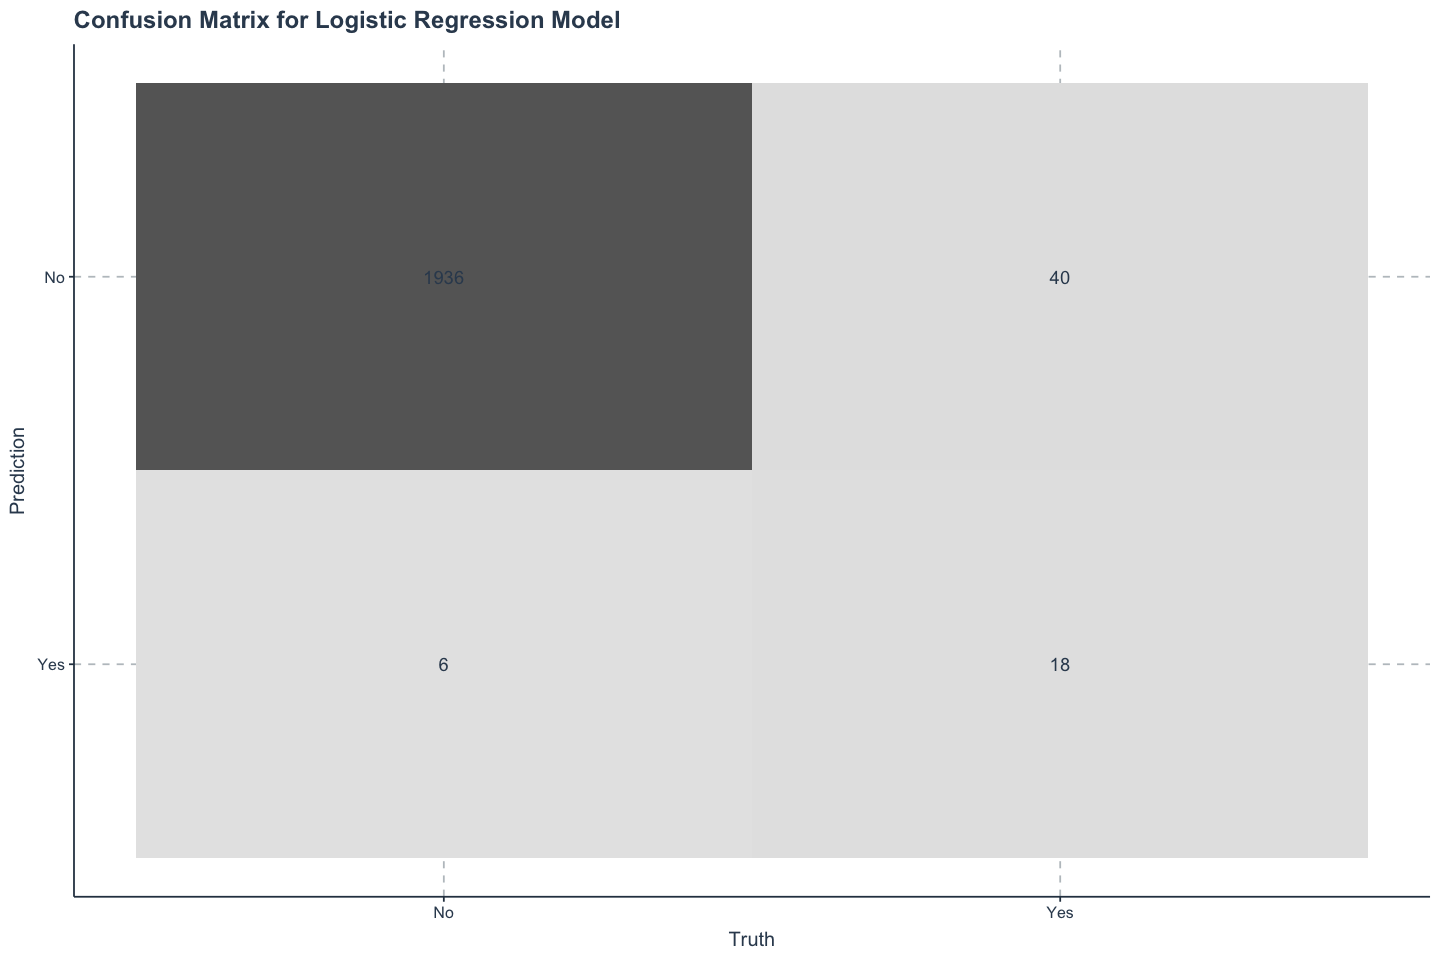

In [16]:
augment( model, new_data = test_data ) %>% 
         conf_mat( truth = default, estimate = .pred_class  ) %>%
         autoplot( type = 'heatmap') +
         ggtitle("Confusion Matrix for Logistic Regression Model")

<br>

### Computing Accuracy Metric

In addition to generating a confusion matrix, we can directly compute the accuracy of our logistic regression model using the accuracy function. Accuracy is a key metric that indicates the proportion of correct predictions made by the model out of all predictions. The following code snippet demonstrates how to compute the accuracy of the model.

In [17]:
augment( model, new_data = test_data ) %>% 
         accuracy( truth = default, estimate = .pred_class ) 

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.977


<br>

This multiple logistic regression model with two features is very accurate with a test data accuracy of 97.7%. 

### Additional Model Assessment Metrics

While accuracy is a useful metric to understand how well the model is performing, it is not always sufficient, especially when dealing with imbalanced datasets. Other metrics such as sensitivity (recall), specificity, precision, and the F1-score provide a more comprehensive view of the model’s performance. Below, we calculate these additional metrics for our logistic regression model.

In [18]:
augment( model, new_data = test_data ) %>% 
    summarise(
               accuracy = mean( .pred_class == default),
               sensitivity = sens_vec(truth = default, estimate = .pred_class),
               specificity = spec_vec(truth = default, estimate = .pred_class),
               precision = precision_vec(truth = default, estimate = .pred_class),
               recall = recall_vec(truth = default, estimate = .pred_class),
               f1 = f_meas_vec(truth = default, estimate = .pred_class)
)

accuracy,sensitivity,specificity,precision,recall,f1
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.977,0.9969104,0.3103448,0.9797571,0.9969104,0.9882593


<br>

### ROC Curve

The Receiver Operating Characteristic (ROC) curve is a graphical representation of a classifier’s performance. It plots the True Positive Rate (Sensitivity) against the False Positive Rate (1 - Specificity) at various threshold settings. The Area Under the ROC Curve (AUC) is a single scalar value that summarizes the performance of the classifier across all thresholds.

Below is a demostration demonstrate how to generate and interpret the ROC curve for our logistic regression model.

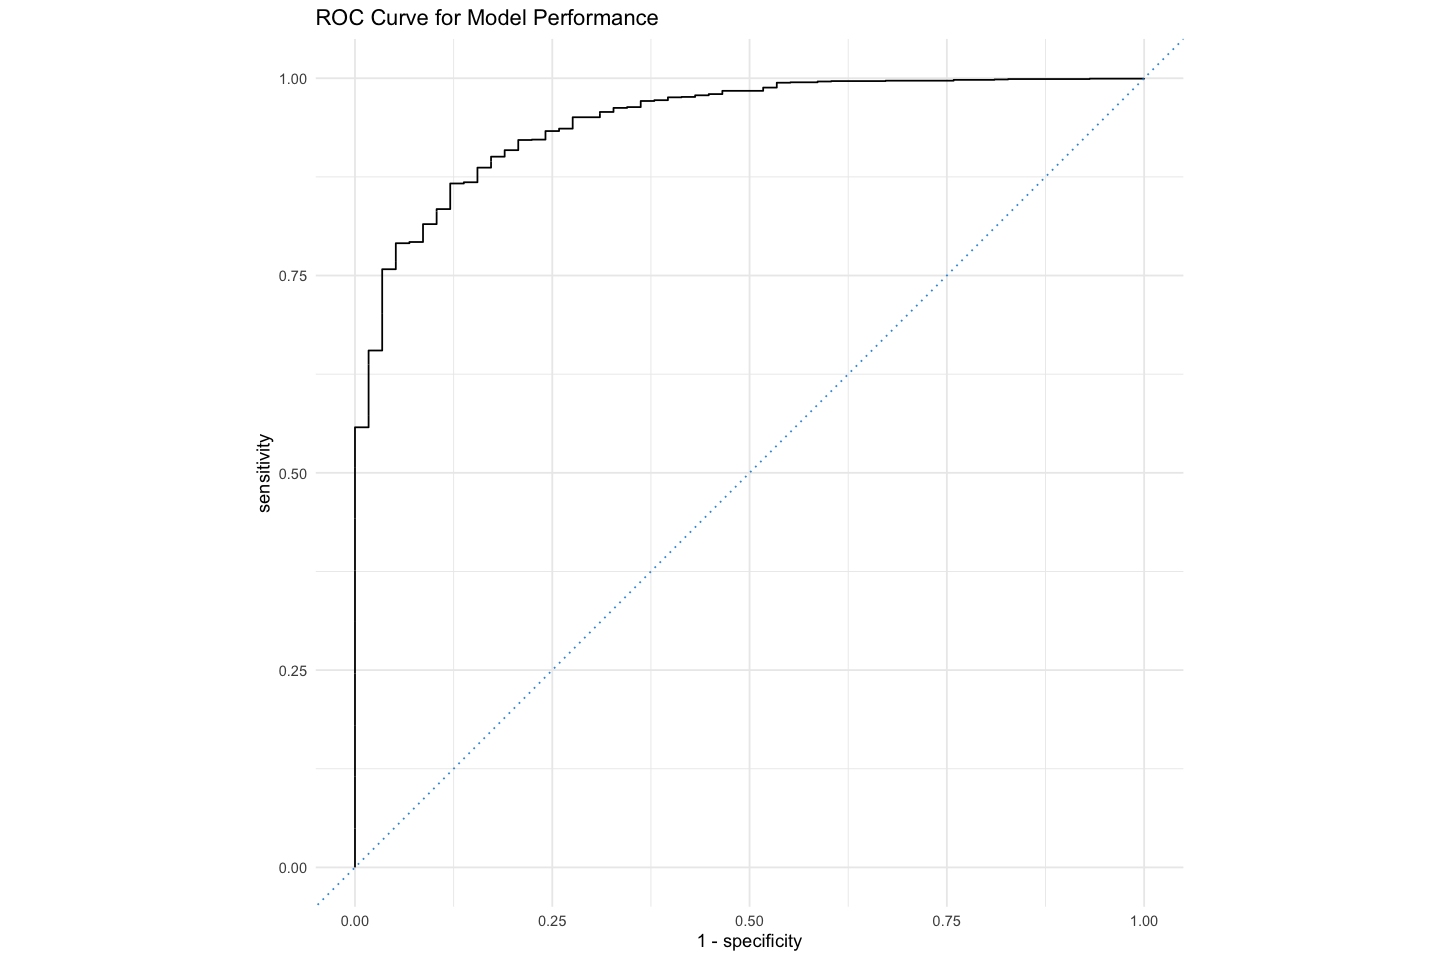

In [19]:
augment( model, new_data = test_data ) %>%
    # set probabilities for the "No" class
    roc_curve(truth = default, .pred_No) %>% 
    autoplot() +
    ggtitle("ROC Curve for Model Performance") + theme_minimal()  

In [20]:
# Calculate AUC
augmented_data <- augment( model, new_data = test_data )
auc_result <- roc_auc(augmented_data, truth = default, .pred_No)

# Display the AUC
print(auc_result)

# A tibble: 1 x 3
  .metric .estimator .estimate
  <chr>   <chr>          <dbl>
1 roc_auc binary         0.946


#### What does the ROC Curve Tell US?

#### Key Takeaways from the ROC Curve:

* Accuracy: The area under the ROC curve (AUC-ROC) represents the model's overall accuracy. An AUC-ROC of 1 represents a perfect classifier, while an AUC-ROC of 0.5 represents a random classifier.

* True Positives and False Positives: The curve shows the relationship between true positives (correctly classified instances) and false positives (incorrectly classified instances) at different thresholds.

* Threshold Selection: The ROC curve helps in selecting the optimal threshold for the model, which balances the true positive rate and false positive rate.

* Model Comparison: ROC curves can be used to compare the performance of different models, with higher AUC-ROC values indicating better performance.

#### Interpreting the ROC Curve:

A curve closer to the top-left corner indicates better performance, as it represents a higher true positive rate and a lower false positive rate.
A curve closer to the diagonal line indicates random performance, as it represents an equal true positive rate and false positive rate.


<br>

### Exercises for the Lab

In this section, we provide a few exercises to help you practice building and evaluating logistic regression models using the tidymodels framework. These exercises will help solidify your understanding of the concepts and techniques covered in this lab.

<br>

__Exercise 1: Build a Logistic Regression Model with an Additional Variable__

Task: Add the student variable to your logistic regression model and evaluate its performance.

Steps:

1.	Modify the steps to include the student variable.
2.	Fit the model to the training data.
3.	Make predictions on the test data.
4.	Evaluate the model’s performance using various metrics.

<br>

__Exercise 2: Compare Model Performance with and without the student Variable__

Task: Compare the performance of the logistic regression models with and without the student variable.

Steps:

1.	Fit both models (with and without the student variable).
2.	Compare their performance metrics side by side.


<br>

__Exercise 3: Generate Model Assessment Metrics and Compare them against the Models__

Task: Visually Compare the performance of the logistic regression models with and without the student variable with the ROC curve.

1. Use the pre-defined template to generate ROC curve for the new model and compare it to the one we just developed.